In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report






In [2]:
#load the dataset 
data=pd.read_csv('HR-Employee-Attrition.csv')
#print first 5 rows
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#get the number of rows and columns
data.shape

(1470, 35)

In [4]:
#calculate statistical data
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
#print information about the data 
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#check for any missing / null values in the data
data.isnull().values.any()

False

In [7]:
#get a count of the number of employees that stayed and left the company
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [8]:
#check unique values in the column
print(data.apply(lambda col: col.unique().sum()))

Age                                                                      1677
Attrition                                                               YesNo
BusinessTravel                       Travel_RarelyTravel_FrequentlyNon-Travel
DailyRate                                                              710161
Department                         SalesResearch & DevelopmentHuman Resources
DistanceFromHome                                                          435
Education                                                                  15
EducationField              Life SciencesOtherMedicalMarketingTechnical De...
EmployeeCount                                                               1
EmployeeNumber                                                        1506552
EnvironmentSatisfaction                                                    10
Gender                                                             FemaleMale
HourlyRate                                                      

<Figure size 1500x1500 with 0 Axes>

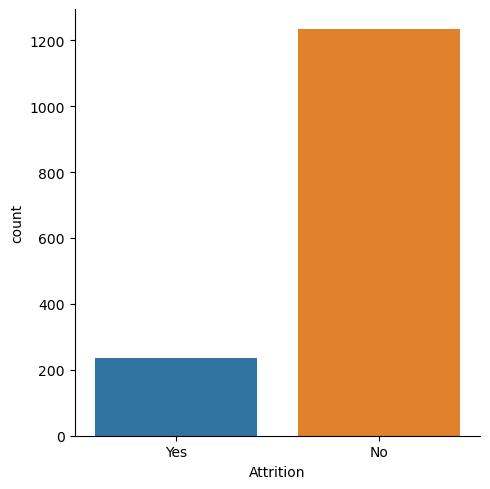

<Figure size 1500x1500 with 0 Axes>

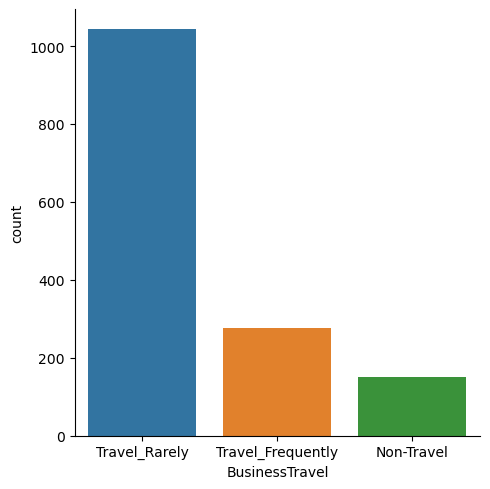

<Figure size 1500x1500 with 0 Axes>

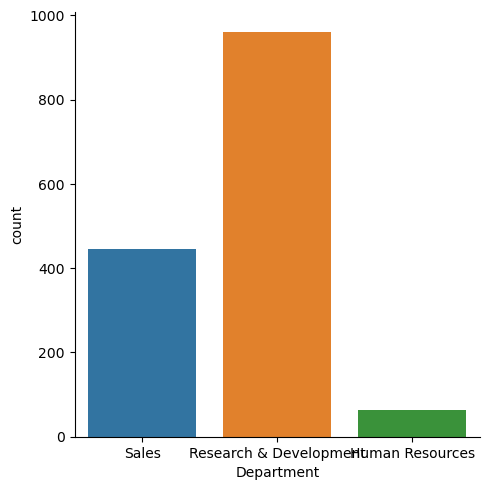

<Figure size 1500x1500 with 0 Axes>

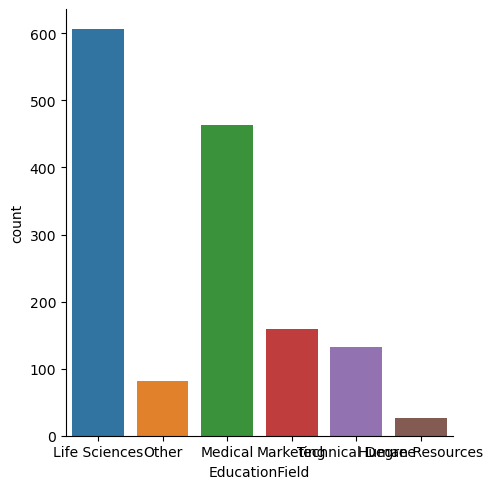

<Figure size 1500x1500 with 0 Axes>

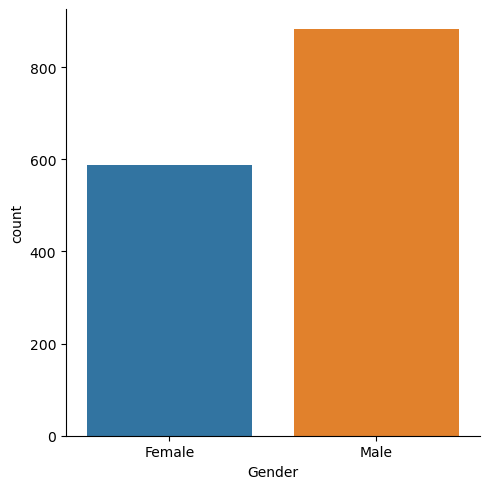

<Figure size 1500x1500 with 0 Axes>

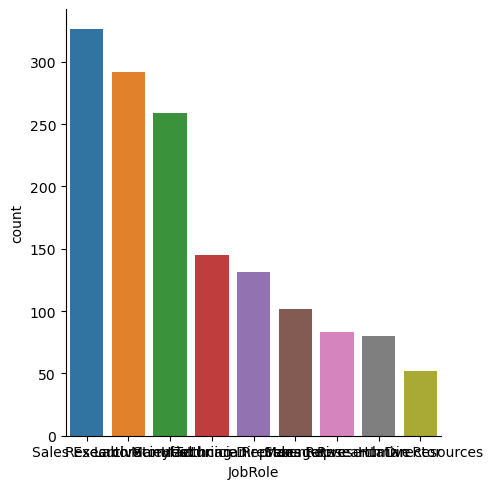

<Figure size 1500x1500 with 0 Axes>

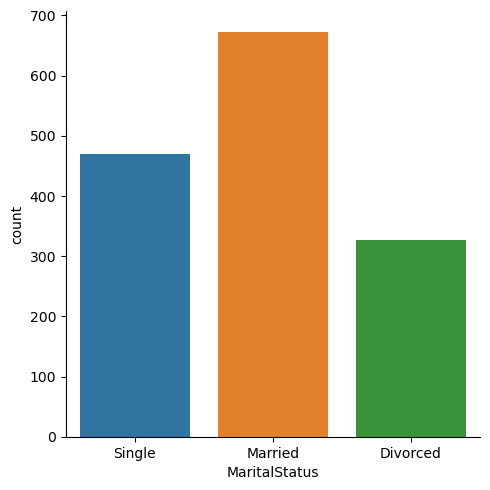

<Figure size 1500x1500 with 0 Axes>

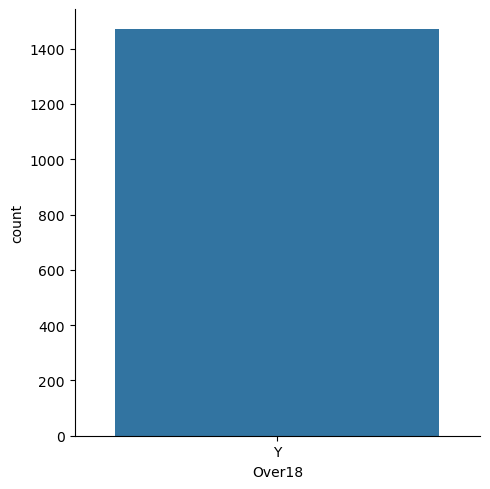

<Figure size 1500x1500 with 0 Axes>

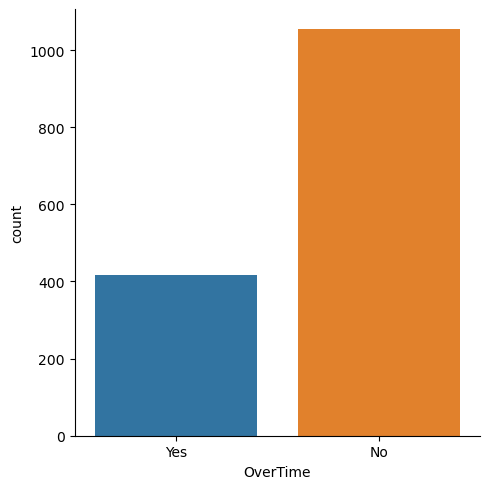

In [10]:
cat_data=data.select_dtypes(include='object')

for i in cat_data:
    plt.figure(figsize=(15, 15))
    sns.catplot(data=data,x=i,kind='count')

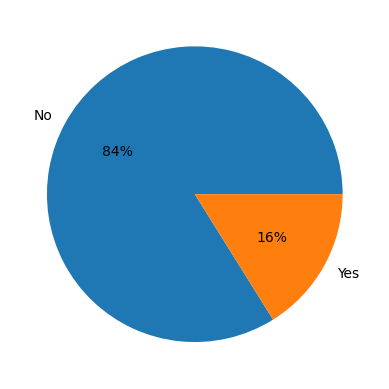

In [11]:
# colors = sns.color_palette("husl", 2)
plt.pie(data['Attrition'].value_counts(),labels=['No','Yes'],autopct='%.0f%%')
plt.show()

In [12]:
# Preprocessing: Separate features and target variable
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Select categorical columns for one-hot encoding
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

In [16]:
# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [21]:
# Convert 'Attrition' column to numerical (0 or 1)
data_encoded['Attrition'] = data_encoded['Attrition'].map({'Yes': 1, 'No': 0})


In [25]:
non_numeric_columns = data_encoded.select_dtypes(exclude=['int', 'float']).columns
data_encoded.drop(columns=non_numeric_columns, inplace=True)


In [26]:
X = data_encoded.drop('Attrition', axis=1)
y = data_encoded['Attrition']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
# Create a logistic regression model
model = LogisticRegression()

In [29]:
# Train the model on the training data
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [30]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [32]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8843537414965986
Confusion Matrix:
 [[251   4]
 [ 30   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       255
           1       0.69      0.23      0.35        39

    accuracy                           0.88       294
   macro avg       0.79      0.61      0.64       294
weighted avg       0.87      0.88      0.86       294



In [33]:
# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [34]:
# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [35]:
# Make predictions
y_pred = rf_classifier.predict(X_test_scaled)

In [36]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.87


In [37]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)


In [38]:
# Train the model
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [46]:
# Make predictions
y_pred = svm_model.predict(X_test_scaled)


In [50]:
classification_rep = classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       1.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.93      0.50      0.46       294
weighted avg       0.88      0.87      0.81       294



In [52]:
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8673469387755102
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294

